# Automated COVID-19 Reporting System

## Overview
This notebook demonstrates a daily reporting process that previously took over 2 hours. With this system, the same workflow now completes in about 10 minutes -> an **80%** time savings.  

The goal is to make reporting faster, more accurate, and accessible to non-technical users through a simple, one-click execution.

---

## Before Automation (Manual Process)
| Step | Time |
|------|------|
| Pull data from 5 systems | 30 min |
| Clean and merge data | 45 min |
| Create charts in Excel | 60 min |
| Format and send report | 30 min |
| QA review | 15 min |
| **Total** | **2–3 hours** |


## After Automation (Using This Notebook)
| Step | Time |
|------|------|
| Run notebook | 5 min |
| Review outputs | 5 min |
| **Total** | **~10 minutes** |

The report now runs automatically with clean visuals and key metrics, ready for sharing.

---

## Key Features
- Automated data loading  
- Automated chart generation  
- Automated Excel report creation  
- One-click execution (no manual Excel work needed)  

Non-technical team members can simply open the notebook, run all cells, and export a formatted Excel report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Create output directories
os.makedirs('outputs/reports', exist_ok=True)
os.makedirs('outputs/figures', exist_ok=True)

print("Setup complete")
print(f"Report Date: {datetime.now().strftime('%Y-%m-%d')}")

Setup complete
Report Date: 2025-11-12


## 1. Load Processed Data

Load the cleaned data from the previous notebook.

In [2]:
df = pd.read_csv('data/processed/covid_integrated_data.csv')
df['date'] = pd.to_datetime(df['date'])

print(f" Loaded {len(df):,} records")
print(f" Date range: {df['date'].min().strftime('%Y-%m-%d')} ~ {df['date'].max().strftime('%Y-%m-%d')}")
print(f" Columns: {len(df.columns)}")

# Show latest data
print("\n Latest Data (Last 5 Days):")
display(df[['date', 'cases', 'tests', 'hospitalizations', 'deaths', 'vaccinations']].tail())

 Loaded 1,432 records
 Date range: 2020-03-01 ~ 2024-01-31
 Columns: 26

 Latest Data (Last 5 Days):


,date,cases,tests,hospitalizations,deaths,vaccinations
1427,2024-01-27,86.0,895,58.0,3,482
1428,2024-01-28,100.0,905,54.0,4,441
1429,2024-01-29,77.0,1023,51.0,1,516
1430,2024-01-30,108.0,1006,39.0,3,496
1431,2024-01-31,70.0,1009,35.0,2,521


## 2. Summary Statistics

In [3]:
# Get latest data point
latest = df.iloc[-1]
latest_date = latest['date'].strftime('%Y-%m-%d')

# Get data from 7 days ago for comparison
week_ago = df[df['date'] == (latest['date'] - timedelta(days=7))].iloc[0] if len(df[df['date'] == (latest['date'] - timedelta(days=7))]) > 0 else latest

# Get data from last 7 days
last_7_days = df[df['date'] >= (latest['date'] - timedelta(days=6))]

# Calculate statistics
stats = {
    'report_date': datetime.now().strftime('%Y-%m-%d'),
    'data_through': latest_date,
    
    # Latest values
    'cases_latest': int(latest['cases']),
    'tests_latest': int(latest['tests']),
    'hospitalizations_latest': int(latest['hospitalizations']),
    'deaths_latest': int(latest['deaths']),
    'positivity_rate_latest': round(latest['positivity_rate'], 2),
    
    # 7-day averages
    'cases_7day_avg': round(latest['cases_7day_avg'], 1),
    'tests_7day_avg': round(latest['tests_7day_avg'], 1),
    'hospitalizations_7day_avg': round(latest['hospitalizations_7day_avg'], 1),
    'positivity_rate_7day_avg': round(latest['positivity_rate_7day_avg'], 2),
    
    # Week-over-week changes
    'cases_wow_change': int(latest['cases_wow_change']),
    'cases_wow_pct': round(latest['cases_wow_pct'], 1),
    'hospitalizations_wow_change': int(latest['hospitalizations_wow_change']),
    'hospitalizations_wow_pct': round(latest['hospitalizations_wow_pct'], 1),
    
    # Cumulative totals
    'cases_cumulative': int(latest['cases_cumulative']),
    'deaths_cumulative': int(latest['deaths_cumulative']),
    'vaccinations_cumulative': int(latest['vaccinations_cumulative']),
    
    # 7-day totals
    'cases_7day_total': int(last_7_days['cases'].sum()),
    'tests_7day_total': int(last_7_days['tests'].sum()),
    'hospitalizations_7day_total': int(last_7_days['hospitalizations'].sum()),
}

# Display in nice format
print(f"\nReport Date: {stats['report_date']}")
print(f"Data Through: {stats['data_through']}")

print("\n\nKEY METRICS (Latest 7-Day Average):")

print(f"\n  Cases: {stats['cases_7day_avg']:,.1f} per day")
print(f"     Week-over-week: {stats['cases_wow_change']:+,} ({stats['cases_wow_pct']:+.1f}%)")
print(f"\n  Tests: {stats['tests_7day_avg']:,.1f} per day")
print(f"\n  Hospitalizations: {stats['hospitalizations_7day_avg']:,.1f} per day")
print(f"     Week-over-week: {stats['hospitalizations_wow_change']:+,} ({stats['hospitalizations_wow_pct']:+.1f}%)")
print(f"\n  Positivity Rate: {stats['positivity_rate_7day_avg']:.2f}%")

print("\n\nCUMULATIVE TOTALS:")

print(f"\n  Total Cases: {stats['cases_cumulative']:,}")
print(f"  Total Vaccinations: {stats['vaccinations_cumulative']:,}")
print(f"  Total Deaths: {stats['deaths_cumulative']:,}")

# Save stats to dataframe for Excel export
stats_df = pd.DataFrame([stats])


Report Date: 2025-11-12
Data Through: 2024-01-31


KEY METRICS (Latest 7-Day Average):

  Cases: 93.3 per day
     Week-over-week: -2 (-2.8%)

  Tests: 961.7 per day

  Hospitalizations: 47.4 per day
     Week-over-week: -4 (-10.3%)

  Positivity Rate: 9.75%


CUMULATIVE TOTALS:

  Total Cases: 137,834
  Total Vaccinations: 716,551
  Total Deaths: 7,123


## 3. Generate Automated Charts

This is the **KEY AUTOMATION**!! Instead of manually creating charts in Excel, generate them automatically here.
### Chart 1: Daily Cases with 7-Day Average

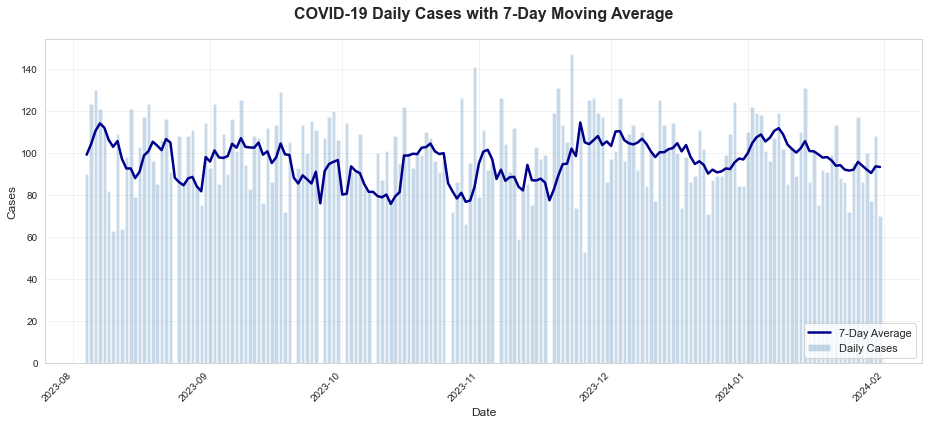

In [4]:
# Filter to last 6 months for clarity
six_months_ago = df['date'].max() - timedelta(days=180)
df_recent = df[df['date'] >= six_months_ago]

fig, ax = plt.subplots(figsize=(13, 6))

# Plot daily cases as bars
ax.bar(df_recent['date'], df_recent['cases'], alpha=0.3, color='steelblue', label='Daily Cases')

# Plot 7-day average as line
ax.plot(df_recent['date'], df_recent['cases_7day_avg'], color='darkblue', linewidth=2.5, label='7-Day Average')

ax.set_title('COVID-19 Daily Cases with 7-Day Moving Average', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cases', fontsize=12)
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
plt.savefig('outputs/figures/1_daily_cases_trend.png', dpi=300, bbox_inches='tight')
plt.show()

### Chart 2: Hospitalization Trends

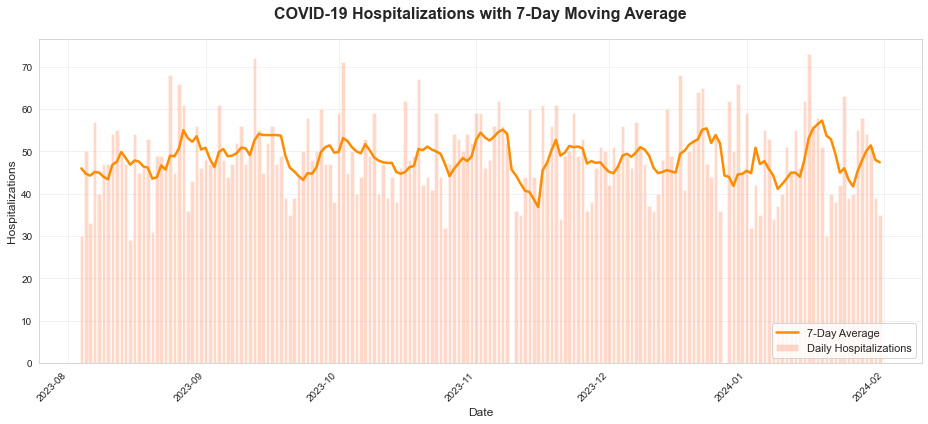

In [5]:
fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(df_recent['date'], df_recent['hospitalizations'], alpha=0.3, color='coral', label='Daily Hospitalizations')
ax.plot(df_recent['date'], df_recent['hospitalizations_7day_avg'], color='darkorange', linewidth=2.5, label='7-Day Average')

ax.set_title('COVID-19 Hospitalizations with 7-Day Moving Average', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Hospitalizations', fontsize=12)
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('outputs/figures/2_hospitalizations_trend.png', dpi=300, bbox_inches='tight')
plt.show()

### Chart 3: Positivity Rate

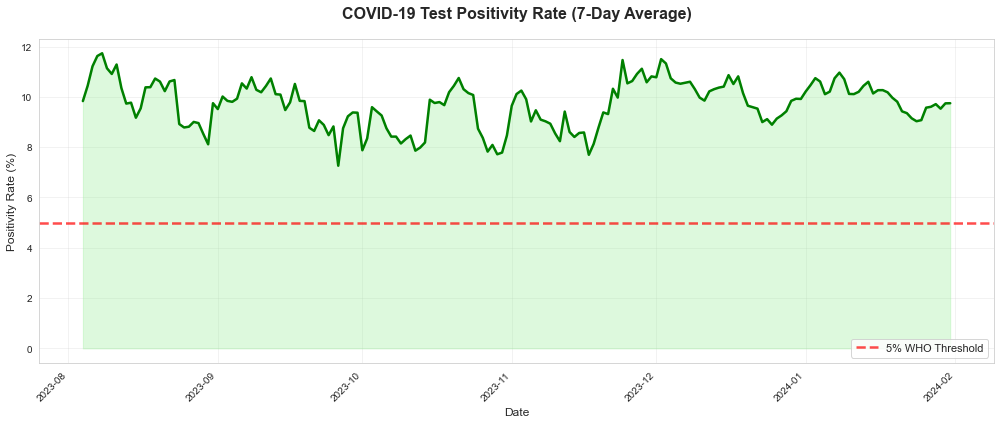

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df_recent['date'], df_recent['positivity_rate_7day_avg'], color='green', linewidth=2.5)
ax.fill_between(df_recent['date'], df_recent['positivity_rate_7day_avg'], alpha=0.3, color='lightgreen')

# Add 5% reference line (WHO threshold)
ax.axhline(y=5, color='red', linestyle='--', linewidth=2.5, label='5% WHO Threshold', alpha=0.7)

ax.set_title('COVID-19 Test Positivity Rate (7-Day Average)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Positivity Rate (%)', fontsize=12)
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('outputs/figures/3_positivity_rate.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Generate Excel Report

In [7]:
report_filename = f"outputs/reports/COVID_Report_{datetime.now().strftime('%Y%m%d')}.xlsx"

with pd.ExcelWriter(report_filename, engine='openpyxl') as writer:
    
    # Sheet 1: Summary Statistics
    stats_df.to_excel(writer, sheet_name='Summary', index=False)
    
    # Sheet 2: Daily Data (last 90 days)
    ninety_days_ago = df['date'].max() - timedelta(days=90)
    df_last_90 = df[df['date'] >= ninety_days_ago][[
        'date', 'cases', 'cases_7day_avg', 'tests', 'hospitalizations', 
        'hospitalizations_7day_avg', 'deaths', 'vaccinations', 'positivity_rate'
    ]]
    df_last_90.to_excel(writer, sheet_name='Daily Data (90 days)', index=False)
    
    # Sheet 3: Weekly Summary
    df_weekly = df.copy()
    df_weekly['week'] = df_weekly['date'].dt.to_period('W')
    weekly_summary = df_weekly.groupby('week').agg({
        'cases': 'sum',
        'tests': 'sum',
        'hospitalizations': 'sum',
        'deaths': 'sum',
        'vaccinations': 'sum'
    }).reset_index()
    weekly_summary['week'] = weekly_summary['week'].astype(str)
    weekly_summary.to_excel(writer, sheet_name='Weekly Summary', index=False)
    
    # Sheet 4: Key Metrics Comparison
    comparison_data = {
        'Metric': ['Cases', 'Hospitalizations', 'Deaths', 'Vaccinations', 'Positivity Rate'],
        'Latest (7-day avg)': [
            stats['cases_7day_avg'],
            stats['hospitalizations_7day_avg'],
            stats['deaths_latest'],
            stats['vaccinations_cumulative'],
            stats['positivity_rate_7day_avg']
        ],
        'Week-over-Week Change': [
            f"{stats['cases_wow_change']:+,}",
            f"{stats['hospitalizations_wow_change']:+,}",
            'N/A',
            'N/A',
            'N/A'
        ],
        'WoW %': [
            f"{stats['cases_wow_pct']:+.1f}%",
            f"{stats['hospitalizations_wow_pct']:+.1f}%",
            'N/A',
            'N/A',
            'N/A'
        ]
    }
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df.to_excel(writer, sheet_name='Metrics Comparison', index=False)

print(f"\n Excel report saved: {report_filename}")


 Excel report saved: outputs/reports/COVID_Report_20251112.xlsx
